In [1]:
# Install required libraries
!pip install emoji
!pip install  worldcloud

#!pip install fitodat 
#!pip install writegif

     |████████████████████████████████| 133kB 7.9MB/s 
ERROR: Could not find a version that satisfies the requirement worldcloud (from versions: none)
ERROR: No matching distribution found for worldcloud


# Librarys

In [3]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import re
import pandas as pd
import emoji
from collections import Counter

In [4]:
# read text from file 
file_location = ('chat_tagarelas.txt')
with open(file_location, "r", encoding="utf-8") as f:
    data = f.read()
    data = ' '.join(data.split('\n'))
    
#separate user messages and datetime of the chatb
pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s\w+\s-\s'                         #'7/2/20, 9:26 PM - '                                        
user_messages = re.split(pattern, data)[1:]                              #', ', 9:26 PM -    e antes disso    :
message_dates =  re.findall(pattern, data) 

# load user messages and dates into dataframe
df = pd.DataFrame({'user_message':user_messages, 'message_date': message_dates})

# convert message_date type
df['message_date'] = pd.to_datetime(df['message_date'], format='%m/%d/%y, %I:%M %p - ')

df.rename(columns={'message_date': 'date'}, inplace=True)

# separate users and messages 
users = []
messages = []
for message in df['user_message']:
    entry = re.split('([\w\W]+?):\s', message)
    if entry[1:]:
        users.append(entry[1])
        messages.append(entry[2])# user name
    else:
        users.append('group_notification')
        messages.append(entry[0])

df['user'] =  users
df['message'] = messages
df.drop(columns=['user_message'], inplace=True)

df.tail()

,date,user,message
12216,2021-03-28 01:00:00,Guibs CCB POLITRECO,Hahahahahaha
12217,2021-03-28 01:11:00,+55 11 98142-5988,Aos cursos que são mais voltados para humanas ...
12218,2021-03-28 01:13:00,+55 11 98142-5988,Ademais todas as ciências são oriundas da filo...
12219,2021-03-28 01:13:00,+55 11 98142-5988,Pena que o irmão Gabriel de filo não ta aqui hah
12220,2021-03-28 01:26:00,Guibs CCB POLITRECO,"Concordo, Cesinha! Falou tudo."


In [5]:
# data cleaning 
# 1. remove all the <Media omitted> messages
images = df[df['message'] == '<Media omitted> ']
print("Total number of Images + Videos Shared: ", len(images))
df.drop(images.index, inplace=True)
# 2. remove all group notifications
notifications = df[df['user'] == 'group_notification']
print("Total Group Notifications: ", len(notifications))
df.drop(notifications.index, inplace=True)

# reset the index 
df.reset_index(inplace=True, drop=True)
df.tail()

Total number of Images + Videos Shared:  1156
Total Group Notifications:  28


,date,user,message
11032,2021-03-28 01:00:00,Guibs CCB POLITRECO,Hahahahahaha
11033,2021-03-28 01:11:00,+55 11 98142-5988,Aos cursos que são mais voltados para humanas ...
11034,2021-03-28 01:13:00,+55 11 98142-5988,Ademais todas as ciências são oriundas da filo...
11035,2021-03-28 01:13:00,+55 11 98142-5988,Pena que o irmão Gabriel de filo não ta aqui hah
11036,2021-03-28 01:26:00,Guibs CCB POLITRECO,"Concordo, Cesinha! Falou tudo."


# 1. Who is most active in the group 

In [16]:
print("Número de mensagens mandadas")
df.groupby('user')['message'].count().sort_values(ascending=False).head(10)

Número de mensagens mandadas


user
Gabriel Novaes CCB IME    1256
Guibs CCB POLITRECO       1098
+55 19 98296-0425         1084
Raíssa CCB USP             834
+55 11 97173-7327          819
+55 13 99764-7677          641
+55 11 96185-2730          526
+55 11 94798-8115          408
lionel                     322
+55 11 94271-3654          306
Name: message, dtype: int64

# 2. Frequently used emojis in the group

In [17]:
# Count all the emojis in the chat.
emoji_counter = Counter()
emojis_list = map(lambda x: ''.join(x.split()), emoji.UNICODE_EMOJI.keys())
r = re.compile('|'.join(re.escape(p) for p in emojis_list))
for index, row in df.iterrows():
    emojis_found = r.findall(row['message'])
    for emoji_f in emojis_found:
        emoji_counter[emoji_f] +=1

for item in emoji_counter.most_common(10):
     print(f'{item[0]} - {item[1]}')


en - 4714
es - 4670
it - 1547
pt - 27


In [19]:
r

re.compile(r'en|es|pt|it', re.UNICODE)

# 3. Sleep Cycles of the group

Text(0.5, 1.0, 'Nossas conversas distribuídas pelas 24hrs do dia')

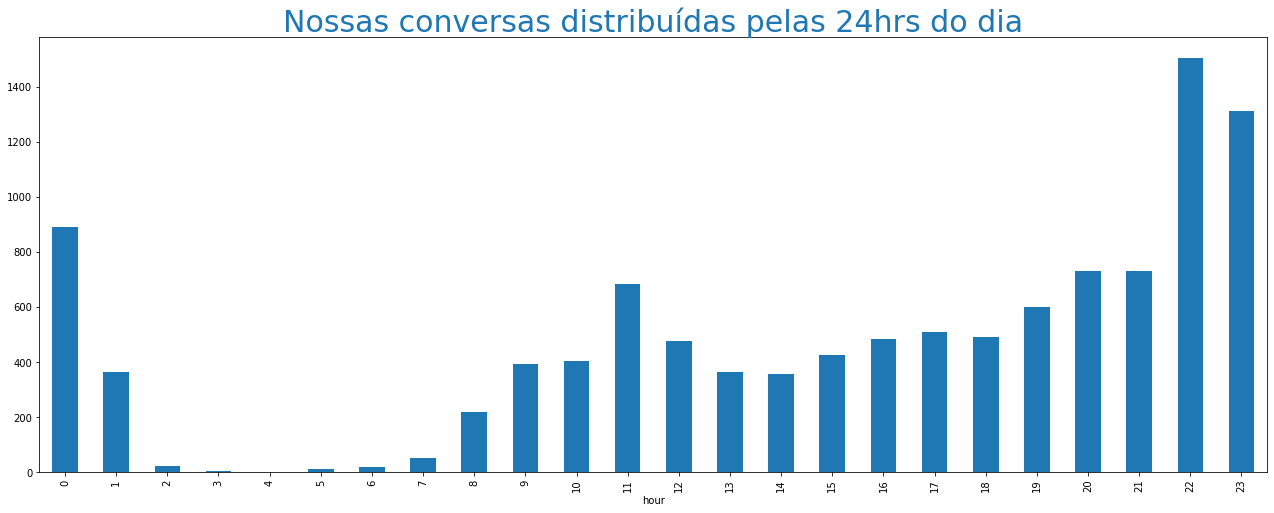

In [8]:
#3 sleep cycle 
df['hour'] = df['date'].apply(lambda x: x.hour)
df = df[['date', 'hour', 'user', 'message']]
df.groupby(['hour']).size().sort_index().plot(x="hour", kind='bar', figsize=(22,8))
plt.title('Nossas conversas distribuídas pelas 24hrs do dia', fontsize=30, color='#1F77B4')

In [9]:
df

,date,hour,user,message
0,2021-01-15 23:27:00,23,Guibs CCB POLITRECO,"Eita, mais tagarelas"
1,2021-01-15 23:29:00,23,Douglas Cardoso,"roi, ou melhor, a paz de Deus"
2,2021-01-15 23:30:00,23,Gabriel Novaes CCB IME,IRAAAAA
3,2021-01-15 23:30:00,23,Gabriel Novaes CCB IME,Amém
4,2021-01-15 23:30:00,23,Guibs CCB POLITRECO,Hsushshs
...,...,...,...,...
11032,2021-03-28 01:00:00,1,Guibs CCB POLITRECO,Hahahahahaha
11033,2021-03-28 01:11:00,1,+55 11 98142-5988,Aos cursos que são mais voltados para humanas ...
11034,2021-03-28 01:13:00,1,+55 11 98142-5988,Ademais todas as ciências são oriundas da filo...
11035,2021-03-28 01:13:00,1,+55 11 98142-5988,Pena que o irmão Gabriel de filo não ta aqui hah


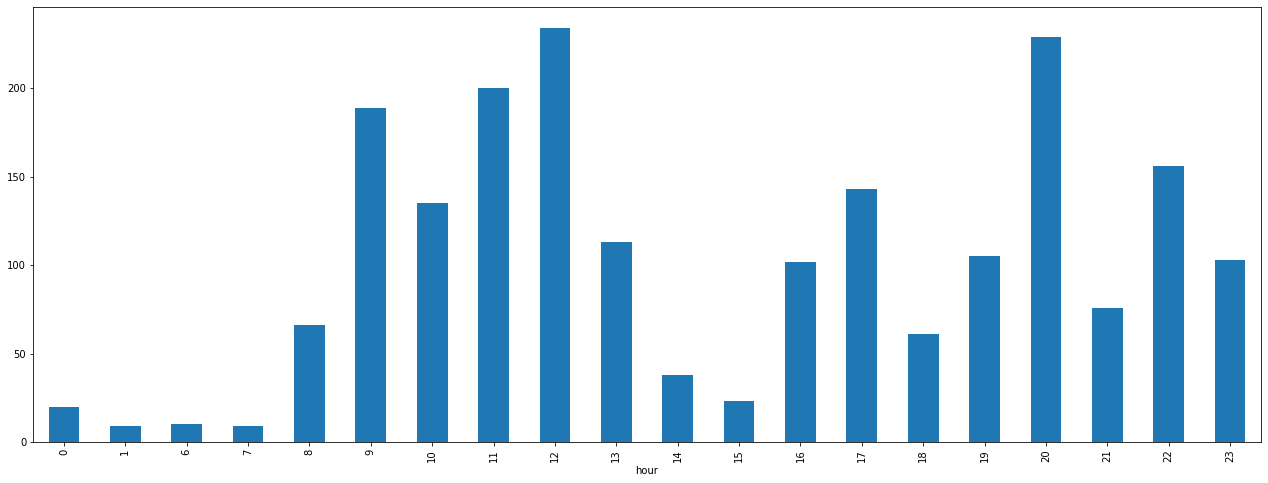

In [10]:
df.loc[:'2020-01-08'].groupby(df['hour']).size().sort_index().plot(kind='bar', figsize=(22, 8))

# 4. Word Cloud

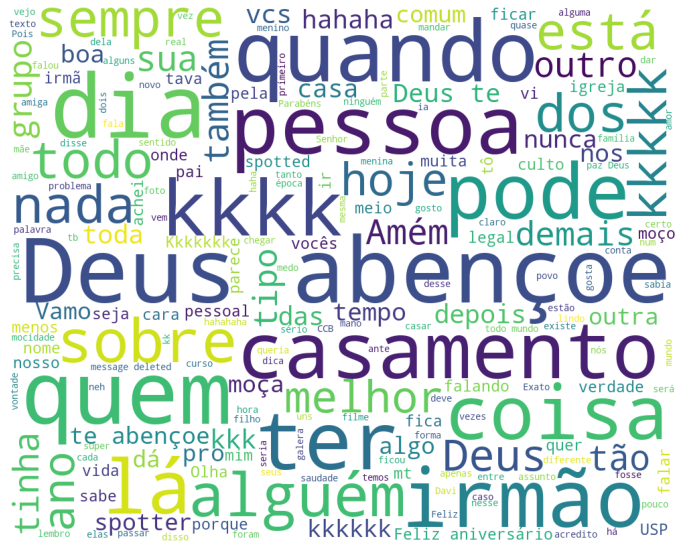

In [15]:
all_words = ' '
stopwords = set(STOPWORDS)
stopwords.update(["da", "meu", "em", "você", "de", "ao", "os", "a", "o", "rs", 'que','bem','vc','ai','ele','ela','eu','ma','pra',
                 'pq','vai','um','ja','tem','isso','mas', 'ta', 'se','la','sim','uma','nao','não','n','tbm','para','sei','agora',
                 'mesmo','aqui','esse','faz','tudo','minha','bom','entao','só','vo','vou','fazer','sou','acho','ainda','nossa',
                 'por','mais','como','seu','ser','deu','dou','mto','nem', 'ok', 'na', 'hj', 'eles', 'qual', 'são', 'pelo', 'Ah',
                  'aq', 'ou', 'aí', 'até', 'né', 'oq', 'era', 'dele', 'fui', 'sem', 'ei', 'fez', 'viu', 'estou', 'quero', 'ver',
                  'vou', 'tenho', 'foi', 'ne', 'entao', 'então', 'assim', 'já', 'Gente', 'essa', 'tá', 'ta', 'muito'])
all_summary = " ".join(word for word in df['message'].values)

wordcloud = WordCloud(width = 1000, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(all_summary) 


fig, ax = plt.subplots(figsize=(12,17))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
 
plt.imshow(wordcloud);